In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('D:\pythonML-class\weather_dataset.csv')
df.head()



,Outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rain,Mild,High,False,Yes
4,Rain,Cool,Normal,False,Yes


In [9]:
#2 Encoding categorical variables
le= LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
#note: axis =1 meana column, axis=0 means row
X=df.drop('PlayTennis',axis=1)
y=df['PlayTennis']
features_names=['Outlook','Temperature','Humidity','Windy']
class_names=['No','Yes']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#train decision treee entropy
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train,y_train)


NameError: name 'LabelEncoder' is not defined

In [5]:
#predictions and accuracy
y_pred = clf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("\nAccuracy:",accuracy)



Accuracy: 1.0


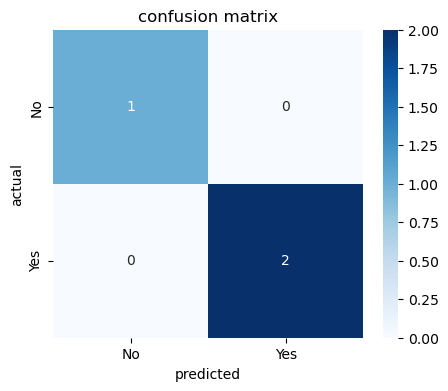

In [6]:
#confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap="Blues", fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()


In [7]:
#node-wise entropy
print("\n Node wise entropy")
for i in range(clf.tree_.node_count):
    print(f"Node {i}: Entropy = {clf.tree_.impurity[i]:.4f}, Samples = {clf.tree_.n_node_samples[i]}")


 Node wise entropy
Node 0: Entropy = 0.9457, Samples = 11
Node 1: Entropy = 0.0000, Samples = 3
Node 2: Entropy = 1.0000, Samples = 8
Node 3: Entropy = 0.8113, Samples = 4
Node 4: Entropy = 1.0000, Samples = 2
Node 5: Entropy = 0.0000, Samples = 1
Node 6: Entropy = 0.0000, Samples = 1
Node 7: Entropy = 0.0000, Samples = 2
Node 8: Entropy = 0.8113, Samples = 4
Node 9: Entropy = 0.0000, Samples = 2
Node 10: Entropy = 1.0000, Samples = 2
Node 11: Entropy = 0.0000, Samples = 1
Node 12: Entropy = 0.0000, Samples = 1


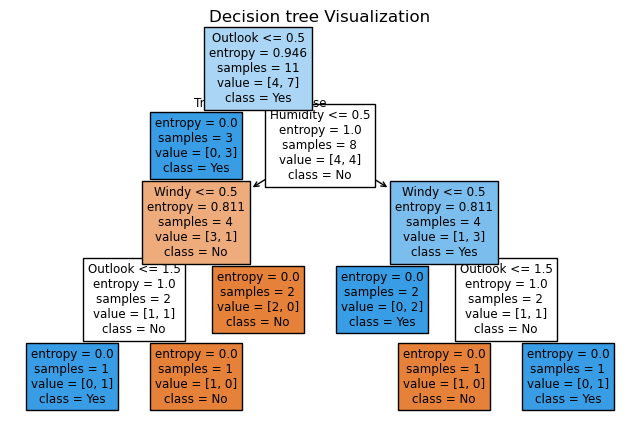

In [8]:
plt.figure(figsize=(8,5))
plot_tree(clf, feature_names=features_names, class_names=class_names, filled=True, impurity=True)
plt.title("Decision tree Visualization")
plt.show()


In [9]:
#text tree representation
tree_rules = export_text(clf, feature_names=features_names)
print("\n Decision Tree Rules:\n")
print(tree_rules)



 Decision Tree Rules:

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Windy >  0.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- Windy >  0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1



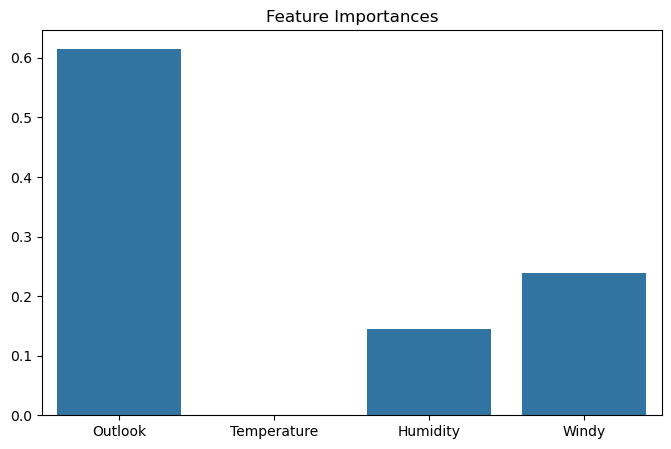

In [10]:
importances = clf.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=features_names, y=importances)
plt.title("Feature Importances")
plt.show()

In [11]:
#random forrest regression
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("\nRandom Forest Accuracy:", rf_accuracy)



Random Forest Accuracy: 0.6666666666666666


In [ ]:
from sklearn.metrics import classification_report, accuracy_score



NameError: name 'load_iris' is not defined

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [7]:
data = load_iris()
X = data.data
y = data.target

#split dataset
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=42)


In [8]:
#defining random forest model
rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(random_state=42)

In [10]:
#hyperparameter tuning using grid search
param_grid = {
'n_estimators':[50,100,150],
'max_depth':[None,10,20,30],
'min_samples_split':[2,5,10],
'min_samples_leaf':[1,2,4],
'bootstrap':[True,False]
}


In [11]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [12]:
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
